In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
p1 = '/content/drive/MyDrive/Colab Notebooks/MVT/Mobile.csv'
df = pd.read_csv(p1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [4]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [6]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [7]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

##Data Preparation
Data preparation follows a series of steps that starts with collecting the right data, followed by cleaning, labeling, and then validation and visualization.

In [8]:
np.array(df["Screen Size (inches)"])

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.1', '6.7', '6.67', '6.55',
       '6.78', '6.43', '6.5', '6.62', '5.4', '6.7', '6.55', '6.2', '6.51',
       '6.5', '6.43', '6.5', '6.6', '6.5', '6.55', '6.67', '6.1', '6.5',
       '6.5', '6.51', '6.5', '6.7', '6.5', '4.7', '6.5', '6.58', '6.5',
       '6.4', '6.43', '6.5', '6.1', '6.52', '6.5', '6.4', '6.43', '6.67',
       '5.4', '6.44', '6.5', '6.5', '6.52', '6.53', '6.5', '6.51', '6.5',
       '6.5', '6.51', '6.53', '6.7', '6.58', '6.7', '6.55', '6.5', '4.7',
       '6.58', '6.5', '6.5', '6.43', '6.43', '6.1', '6.51', '6.5', '6.6',
       '6.43', '6.55', '6.1', '6.56', '6.5', '6.1', '6.2', '6.43', '6.4',
       '6.67', '6.43', '6.78', '6.55', '6.7', '6.67', '6.1', '6.8 + 3.9',
       '6.67', '4.5', '6.7', '6.67', '6.5', '6.43', '6.58', '6.8', '6.39',
       '6.7', '5.9', '4.5', '5.5', '6.7', '6.7', '6.81', '6.52', '6.51',
       '6.5', '6.5', '6.5', '6.5', '6.5', '6.78', '6.8', '5.99', '6.55',
       '6.5', '6.5', '6.5', '6.5', '6.5', 

In [9]:
df["Price ($)"]=df["Price ($)"].str.extract('(\d+)', expand=False)


In [10]:
df["Price ($)"]

0       999
1      1199
2       899
3       279
4       799
       ... 
402    1049
403     349
404    1099
405     429
406     649
Name: Price ($), Length: 407, dtype: object

In [11]:
df["Price ($)"]=df["Price ($)"].astype(int)

In [12]:
df["RAM "]=df["RAM "].str.replace("GB","")
df["RAM "]=df["RAM "].astype(int)

In [13]:
df["Storage "]=df["Storage "].str.replace("GB","")
df["Storage "]=df["Storage "].astype(int)

In [14]:
df['n_cameras'] = df['Camera (MP)'].str.count('\\+') + 1

In [15]:
res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)

    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')

    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')

    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')

    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])

df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df= df.drop(columns='Camera (MP)')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,3,12,12,12,0
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,4,108,10,10,12
2,OnePlus,9 Pro,128,8,6.7,4500,899,4,48,50,8,2
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,64,8,5,2
4,Google,Pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0


In [16]:
df['Screen Size (inches)'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')

In [17]:
cem1 = []
cem2 = []
cem3 = []
for x in df['Screen Size (inches)']:
    resolutions = x.split('.')
    tam = len(resolutions)

    if tam == 1:
        cem1.append(resolutions[0])
        cem2.append('0')
        cem3.append('0')

    if tam == 2:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append('0')

    if tam == 3:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append(resolutions[2])


df['cem1'] = cem1
df['cem2'] = cem2
df['cem3'] = cem3

df= df.drop(columns='Screen Size (inches)')

In [18]:
df["screen"] = df['cem1']+"."+ df["cem2"]
df=df.drop(["cem1","cem2","cem3"],axis=1)
df

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.1
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.8
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.7
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12.2,0,0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,4300,1049,3,12,64,12,0,6.7
403,Xiaomi,Mi 10 Lite 5G,128,6,4160,349,4,48,8,2,2,6.57
404,Apple,iPhone 12 Pro Max,128,6,3687,1099,3,12,12,12,0,6.7
405,Oppo,Reno3,128,8,4025,429,4,48,13,8,2,6.4


In [19]:
df["screen"]=df["screen"].astype(float)

In [20]:
df["res1"]=df["res1"].str.extract('(\d+)', expand=False)

In [21]:
df["res1"]=df["res1"].astype(int)

In [22]:
df["res2"]=df["res2"].str.extract('(\d+)', expand=False)

In [23]:
df["res2"]=df["res2"].astype(int)

In [24]:
df["res3"]=df["res3"].str.extract('(\d+)', expand=False)

In [25]:
df["res3"]=df["res3"].astype(int)

In [26]:
np.array(df["res4"])

array(['0', ' 12', ' 2', ' 2', '0', '0', '0', ' 2', ' 2', ' 8', '0', ' 5',
       '0', '0', ' 3', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0',
       ' 2', '0', '0', '0', '0', '0', ' 5', ' 2', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       ' 2', '0', '0', '0', ' 5', '0', ' 2', '0', '0', ' 5', ' 2', '0',
       '0', '0', ' 2', ' 5', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       '0', '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 8MP', ' 2MP',
       '0', '0', '0', '0', '0', '0', ' 5MP', ' 2MP', '0', ' 2MP', '0',
       '0', '0', ' 2MP', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 2MP', '0', '0', '0',
       ' 2MP', '0', '0', '0', ' 2MP', '0', '0', '0', ' 5MP', ' 2MP', '0',
       '0', ' 5MP', '0', '0', '0', '0', '0', '0', ' 2MP', '0', '0', '0',
       '0', ' 2MP', '0', '0', ' 10MP', '0', '0', '0', '0', '0', ' 2MP',
       '0', '0', '0', '0', '0', '0', '0', '0', ' 2MP

In [27]:
df["res4"]=df["res4"].str.extract('(\d+)', expand=False)

In [28]:
df['res4'].isnull().sum()

1

In [29]:
df['res4'] = df['res4'].fillna(0)

In [30]:
df['res4'].isnull().sum()

0

In [31]:
df['res4'] = df['res4'].astype(int)

In [32]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.10
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.80
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.70
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12,0,0,6.40


In [33]:
# Select numeric columns for skewness and kurtosis analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [34]:
print(numeric_columns)

Index(['Storage ', 'RAM ', 'Battery Capacity (mAh)', 'Price ($)', 'n_cameras',
       'res1', 'res2', 'res3', 'res4', 'screen'],
      dtype='object')


###Principal Component Analysis

In [35]:
df.corr()

<ipython-input-35-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
Storage,1.000000,0.691341,-0.074952,0.684934,0.307613,0.361980,0.526689,0.556139,0.289007,0.258582
RAM,0.691341,1.000000,-0.027627,0.590728,0.338579,0.511801,0.534353,0.489217,0.309690,0.294423
Battery Capacity (mAh),-0.074952,-0.027627,1.000000,-0.411216,0.388638,0.290042,-0.115906,-0.045846,0.172771,0.609571
Price ($),0.684934,0.590728,-0.411216,1.000000,0.050155,0.107906,0.598090,0.508667,0.166501,0.039514
n_cameras,0.307613,0.338579,0.388638,0.050155,1.000000,0.479489,0.221796,0.346142,0.646925,0.450435
res1,0.361980,0.511801,0.290042,0.107906,0.479489,1.000000,0.151836,0.179372,0.420375,0.382067
res2,0.526689,0.534353,-0.115906,0.598090,0.221796,0.151836,1.000000,0.453320,0.223225,0.154706
res3,0.556139,0.489217,-0.045846,0.508667,0.346142,0.179372,0.453320,1.000000,0.264716,0.238167
res4,0.289007,0.309690,0.172771,0.166501,0.646925,0.420375,0.223225,0.264716,1.000000,0.213166
screen,0.258582,0.294423,0.609571,0.039514,0.450435,0.382067,0.154706,0.238167,0.213166,1.000000


<ipython-input-36-effb445d3340>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Text(0.5, 1.0, 'Correlation between different fearures')

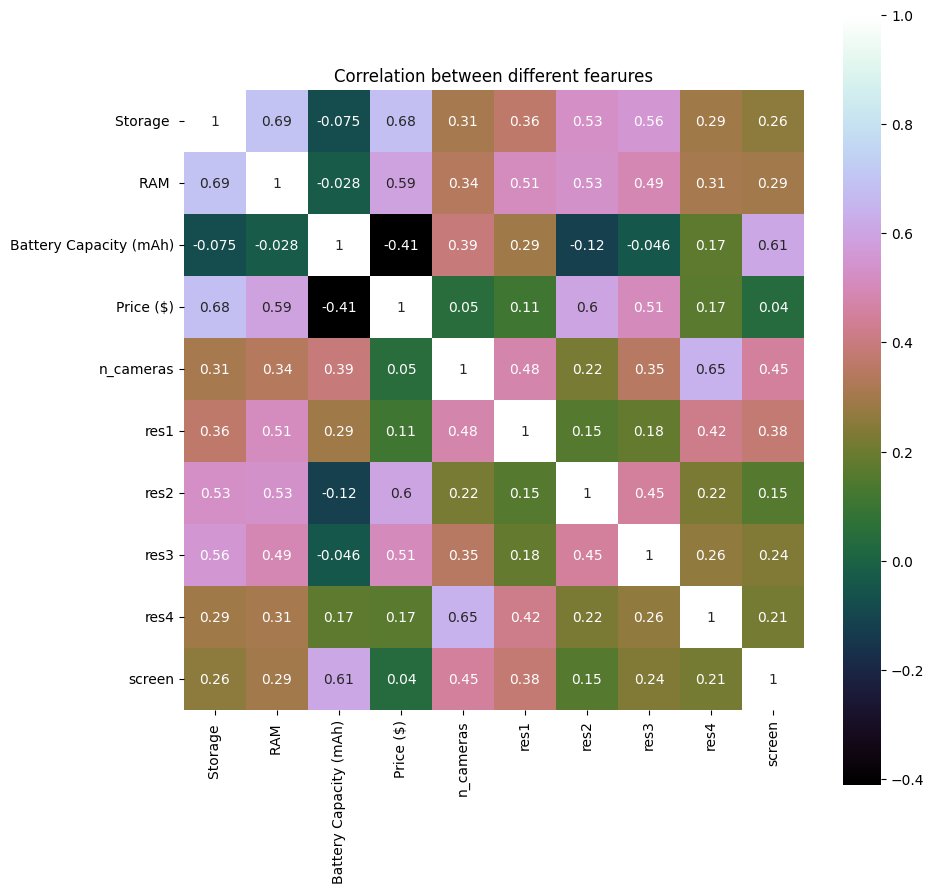

In [36]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [37]:
dept=df.groupby('Brand').sum()
dept

<ipython-input-37-145b2f92f63d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dept=df.groupby('Brand').sum()


,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
Brand,,,,,,,,,,
Apple,3840,119,85917,22370,62,360,271,108,0,176.10
Asus,640,30,20000,3496,11,256,49,25,0,26.02
Blackberry,192,16,10500,1497,6,37,30,0,0,14.99
CAT,32,3,4200,299,2,13,5,0,0,5.50
Google,896,52,28139,4893,14,160,104,0,0,42.70
Huawei,2624,88,49940,9398,46,586,192,146,23,78.28
LG,512,20,12300,1847,10,176,26,19,2,20.33
Motorola,2432,104,115500,6397,70,1277,152,64,8,151.61
Nokia,2080,112,126080,6852,80,880,149,38,16,182.93


In [38]:
df['Brand'].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Xiaomi', 'Google', 'Oppo', 'Vivo',
       'Realme', 'Motorola', 'Nokia', 'Sony', 'LG', 'Asus', 'Blackberry',
       'CAT', 'Huawei'], dtype=object)

In [39]:
groupby_brand=df.groupby('Brand').mean()
groupby_brand

<ipython-input-39-1ee09bfb17a7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_brand=df.groupby('Brand').mean()


,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
Brand,,,,,,,,,,
Apple,128.000000,3.966667,2863.900000,745.666667,2.066667,12.000000,9.033333,3.600000,0.000000,5.870000
Asus,160.000000,7.500000,5000.000000,874.000000,2.750000,64.000000,12.250000,6.250000,0.000000,6.505000
Blackberry,64.000000,5.333333,3500.000000,499.000000,2.000000,12.333333,10.000000,0.000000,0.000000,4.996667
CAT,32.000000,3.000000,4200.000000,299.000000,2.000000,13.000000,5.000000,0.000000,0.000000,5.500000
Google,128.000000,7.428571,4019.857143,699.000000,2.000000,22.857143,14.857143,0.000000,0.000000,6.100000
Huawei,218.666667,7.333333,4161.666667,783.166667,3.833333,48.833333,16.000000,12.166667,1.916667,6.523333
LG,170.666667,6.666667,4100.000000,615.666667,3.333333,58.666667,8.666667,6.333333,0.666667,6.776667
Motorola,105.739130,4.521739,5021.739130,278.130435,3.043478,55.521739,6.608696,2.782609,0.347826,6.591739
Nokia,74.285714,4.000000,4502.857143,244.714286,2.857143,31.428571,5.321429,1.357143,0.571429,6.533214


Text(0.5, 1.0, 'Mean Satisfaction Level of each Brand')

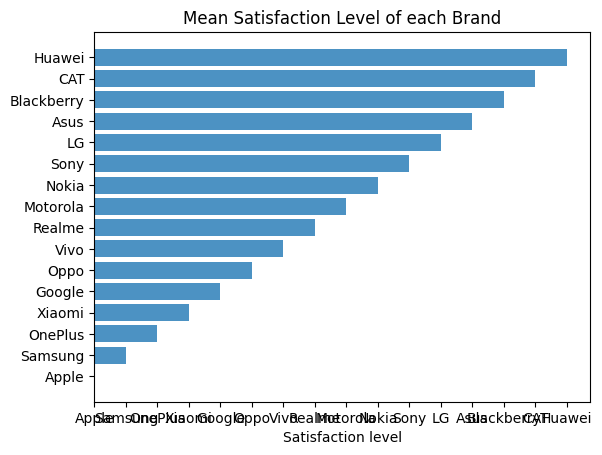

In [69]:

Brand_name=('Apple', 'Samsung', 'OnePlus', 'Xiaomi', 'Google', 'Oppo', 'Vivo',
       'Realme', 'Motorola', 'Nokia', 'Sony', 'LG', 'Asus', 'Blackberry',
       'CAT', 'Huawei')
Brand=('Apple', 'Samsung', 'OnePlus', 'Xiaomi', 'Google', 'Oppo', 'Vivo',
       'Realme', 'Motorola', 'Nokia', 'Sony', 'LG', 'Asus', 'Blackberry',
       'CAT', 'Huawei')
y_pos = np.arange(len(Brand))
x=np.arange(0,1,0.1)

plt.barh(y_pos, Brand, align='center', alpha=0.8)
plt.yticks(y_pos,Brand_name )
plt.xlabel('Satisfaction level')
plt.title('Mean Satisfaction Level of each Brand')

In [41]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.10
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.80
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.70
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12,0,0,6.40


In [42]:
df_drop=df.copy()

In [43]:
df_drop=df.drop(labels=['Brand','Model','res1','res2','res3','res4'],axis=1)

In [44]:
cols = df_drop.columns.tolist()
cols

['Storage ',
 'RAM ',
 'Battery Capacity (mAh)',
 'Price ($)',
 'n_cameras',
 'screen']

In [45]:
df_drop.head()

,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,screen
0,128,6,3095,999,3,6.10
1,256,12,5000,1199,4,6.80
2,128,8,4500,899,4,6.70
3,128,6,5020,279,4,6.67
4,128,8,4614,799,2,6.40


In [46]:
cols.insert(0, cols.pop(cols.index('screen')))

In [47]:
cols

['screen',
 'Storage ',
 'RAM ',
 'Battery Capacity (mAh)',
 'Price ($)',
 'n_cameras']

In [48]:
df_drop = df_drop.reindex(columns= cols)

In [49]:
df_drop.head()

,screen,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras
0,6.10,128,6,3095,999,3
1,6.80,256,12,5000,1199,4
2,6.70,128,8,4500,899,4
3,6.67,128,6,5020,279,4
4,6.40,128,8,4614,799,2


In [50]:
X = df_drop.iloc[:,1:6].values
y = df_drop.iloc[:,0].values
X

array([[ 128,    6, 3095,  999,    3],
       [ 256,   12, 5000, 1199,    4],
       [ 128,    8, 4500,  899,    4],
       ...,
       [ 128,    6, 3687, 1099,    3],
       [ 128,    8, 4025,  429,    4],
       [ 128,    6, 4500,  649,    3]])

In [51]:
y

array([6.1 , 6.8 , 6.7 , 6.67, 6.4 , 6.1 , 6.7 , 6.67, 6.55, 6.78, 6.43,
       6.5 , 6.62, 5.4 , 6.7 , 6.55, 6.2 , 6.51, 6.5 , 6.43, 6.5 , 6.6 ,
       6.5 , 6.55, 6.67, 6.1 , 6.5 , 6.5 , 6.51, 6.5 , 6.7 , 6.5 , 4.7 ,
       6.5 , 6.58, 6.5 , 6.4 , 6.43, 6.5 , 6.1 , 6.52, 6.5 , 6.4 , 6.43,
       6.67, 5.4 , 6.44, 6.5 , 6.5 , 6.52, 6.53, 6.5 , 6.51, 6.5 , 6.5 ,
       6.51, 6.53, 6.7 , 6.58, 6.7 , 6.55, 6.5 , 4.7 , 6.58, 6.5 , 6.5 ,
       6.43, 6.43, 6.1 , 6.51, 6.5 , 6.6 , 6.43, 6.55, 6.1 , 6.56, 6.5 ,
       6.1 , 6.2 , 6.43, 6.4 , 6.67, 6.43, 6.78, 6.55, 6.7 , 6.67, 6.1 ,
       6.83, 6.67, 4.5 , 6.7 , 6.67, 6.5 , 6.43, 6.58, 6.8 , 6.39, 6.7 ,
       5.9 , 4.5 , 5.5 , 6.7 , 6.7 , 6.81, 6.52, 6.51, 6.5 , 6.5 , 6.5 ,
       6.5 , 6.5 , 6.78, 6.8 , 5.99, 6.55, 6.5 , 6.5 , 6.5 , 6.5 , 6.5 ,
       6.4 , 6.51, 6.67, 6.51, 6.4 , 6.55, 6.6 , 6.82, 6.4 , 6.67, 6.5 ,
       6.67, 6.5 , 6.58, 6.52, 6.8 , 6.5 , 6.62, 6.5 , 6.5 , 6.51, 6.43,
       6.5 , 6.5 , 6.5 , 6.5 , 6.4 , 6.8 , 6.58, 6.

In [52]:
np.shape(X)

(407, 5)

In [53]:
np.shape(y)

(407,)

In [54]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [55]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00246305  0.69304384 -0.07513627  0.68662074  0.30837039]
 [ 0.69304384  1.00246305 -0.02769547  0.59218253  0.33941296]
 [-0.07513627 -0.02769547  1.00246305 -0.41222935  0.38959507]
 [ 0.68662074  0.59218253 -0.41222935  1.00246305  0.05027831]
 [ 0.30837039  0.33941296  0.38959507  0.05027831  1.00246305]]


In [56]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00246305  0.69304384 -0.07513627  0.68662074  0.30837039]
 [ 0.69304384  1.00246305 -0.02769547  0.59218253  0.33941296]
 [-0.07513627 -0.02769547  1.00246305 -0.41222935  0.38959507]
 [ 0.68662074  0.59218253 -0.41222935  1.00246305  0.05027831]
 [ 0.30837039  0.33941296  0.38959507  0.05027831  1.00246305]]


Text(0.5, 1.0, 'Correlation between different features')

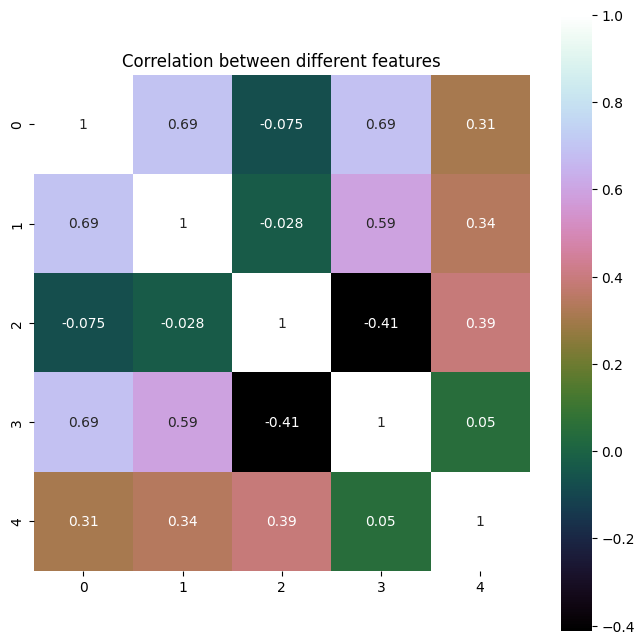

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [58]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 0.57496752  0.05693812 -0.20774105 -0.64233945  0.45870916]
 [ 0.55165468  0.12399195 -0.23998498  0.01903495 -0.78889035]
 [-0.13089013  0.70600629 -0.59845001  0.28781303  0.20843259]
 [ 0.5413362  -0.28958709  0.00208102  0.70778343  0.34947491]
 [ 0.23433385  0.63172659  0.7355978   0.05695589  0.04075612]]

Eigenvalues 
[2.45664912 1.50923153 0.48782891 0.23167254 0.32693317]


###Selecting Principal Components

In [59]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.456649116958094
1.5092315336324813
0.4878289096527927
0.3269331690492304
0.23167254164336587


In [60]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

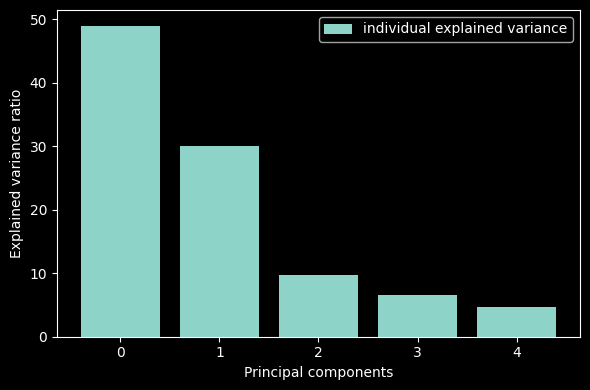

In [61]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), var_exp, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [62]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(5,1),
                      eig_pairs[1][1].reshape(5,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.57496752  0.05693812]
 [ 0.55165468  0.12399195]
 [-0.13089013  0.70600629]
 [ 0.5413362  -0.28958709]
 [ 0.23433385  0.63172659]]


In [63]:
Y = X_std.dot(matrix_w)
Y

array([[ 1.40639852e+00, -2.09967736e+00],
       [ 4.25873123e+00,  6.15589246e-01],
       [ 1.74347520e+00,  1.52471067e-01],
       [ 5.73448549e-02,  1.12474074e+00],
       [ 9.42374369e-01, -1.25816831e+00],
       [ 3.29662161e-01, -3.05753645e+00],
       [ 2.66247733e+00, -2.50880323e+00],
       [-2.11418576e-02,  1.27855405e+00],
       [ 1.37366177e+00,  3.50302282e-01],
       [ 4.34092657e+00,  1.72237018e-01],
       [-6.34454134e-02, -1.91123028e-01],
       [ 4.57169437e-01,  4.95497890e-01],
       [ 3.08584772e-01,  3.54322611e-01],
       [-3.25722905e-01, -3.53616604e+00],
       [ 4.34092657e+00,  1.72237018e-01],
       [-2.23477402e-02, -4.12799142e-01],
       [ 1.34203704e+00, -9.97285201e-01],
       [-3.86019494e-01,  3.80819490e-01],
       [-2.01112775e-01,  2.81903882e-01],
       [ 8.13194498e-01,  4.98358381e-01],
       [-2.88664743e-01,  2.09262672e+00],
       [-9.91046439e-01, -6.05726055e-01],
       [-2.93566135e-01,  3.31361686e-01],
       [ 1.

<ipython-input-64-225f5179fe1c>:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,5,1)


Text(0, 0.5, 'Cumulative explained variance')

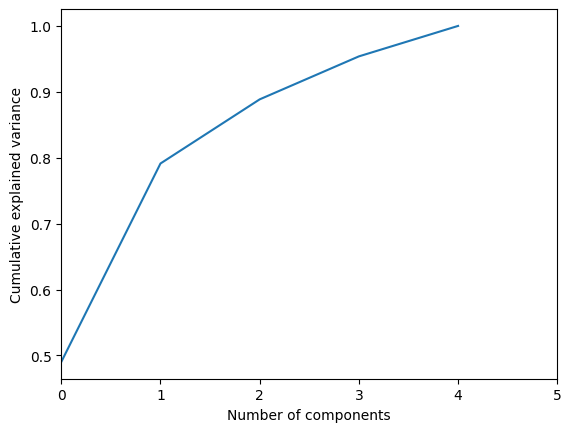

In [64]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows almost 90% variance by the first 4 components. Therfore we can drop 5th component

In [65]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [66]:
print(Y_sklearn)

[[ 1.40639852  2.09967736 -1.02511451  0.27676754]
 [ 4.25873123 -0.61558925  0.47019344  0.02239855]
 [ 1.7434752  -0.15247107 -0.70851106 -0.07241063]
 ...
 [ 1.49398595  1.67366393 -0.58086642  0.55111288]
 [ 0.9524992  -0.19618981 -1.06218959 -0.75780329]
 [ 0.52825609  0.50765297  0.03339915  0.2267668 ]]


In [67]:
Y_sklearn.shape

(407, 4)

Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.